In [1]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])

In [3]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [4]:
df = pd.read_csv('result_final.csv')

In [5]:
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])
df

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
...,...,...,...,...,...,...,...,...,...
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20
2096,2096,portrait_9_7.jpeg,3,2.584903,Philipp,False,portrait_9,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


In [6]:
df['proband'].unique()

array(['Louis', 'david', 'Witek', 'johann', 'jarl', 'Hjalmar', 'Philipp'],
      dtype=object)

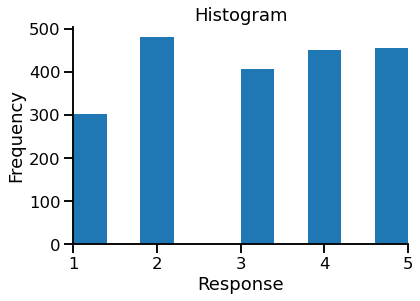

In [7]:
plt.title('Histogram')
#d = df[df['category'] == category]

plt.hist(df['response'])
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.xlim((1, 5))
sns.despine()

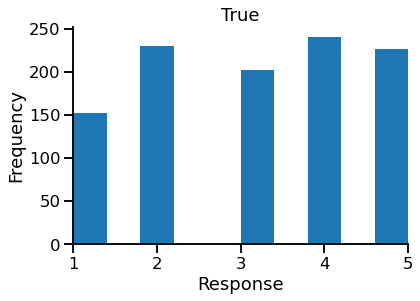

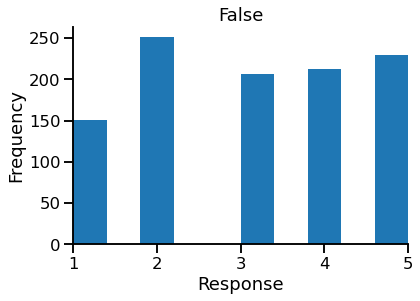

In [8]:
#split by rotation
for rotation in df['rotation'].unique():
    plt.figure()
    plt.title(rotation)
    d = df[df['rotation'] == rotation]

    plt.hist(d['response'])
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.xlim((1, 5))
    sns.despine()

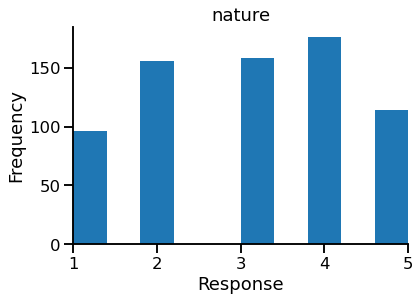

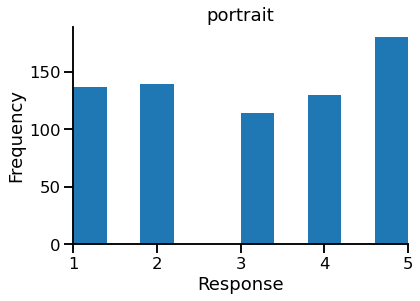

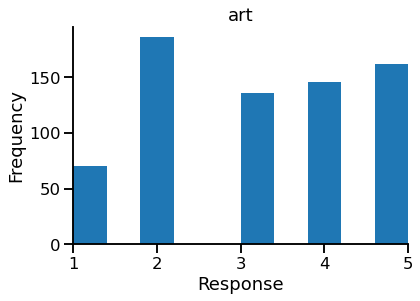

In [9]:
#split by category
for category in df['category'].unique():
    plt.figure()
    plt.title(category)
    d = df[df['category'] == category]

    plt.hist(d['response'])
    plt.xlabel('Response')
    plt.ylabel('Frequency')
    plt.xlim((1, 5))
    sns.despine()

<Figure size 432x288 with 0 Axes>

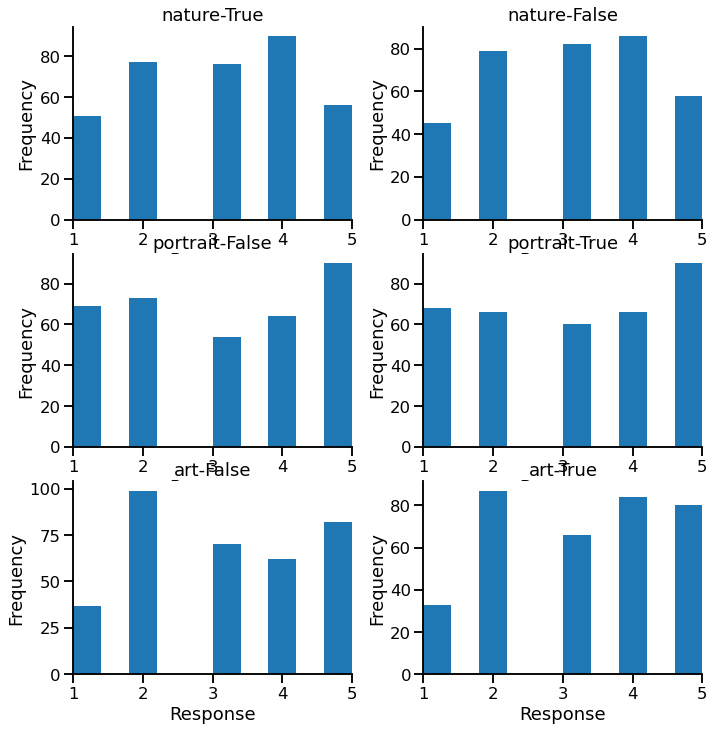

<Figure size 432x288 with 0 Axes>

In [15]:
#split by rotation and category
i= 1
f, axs = plt.subplots(2,2,figsize=(10,10))
f.tight_layout()

for category in df['category'].unique():
    
    d = df[df['category'] == category]
    for rotation in d['rotation'].unique():
        plt.subplot(3, 2, i)
        plt.title(category + '-' + str(rotation))
        e = d[d['rotation'] == rotation]

        plt.hist(e['response'])
        plt.xlabel('Response')
        plt.ylabel('Frequency')
        plt.xlim((1, 5))
        sns.despine()
        i += 1
plt.figure()

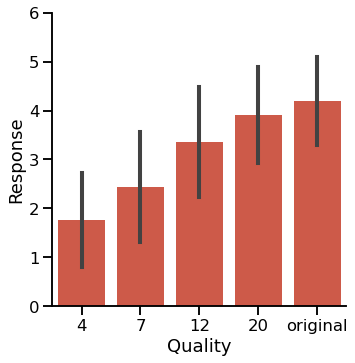

In [11]:
#Plot Response to Quality of all
g = sns.catplot(x='sigma', y='response', data=df,
                kind='bar', ci='sd', color='#e34a33')

g.set_ylabels('Response')
g.set_xlabels('Quality')
g.set(ylim = (0, 6))

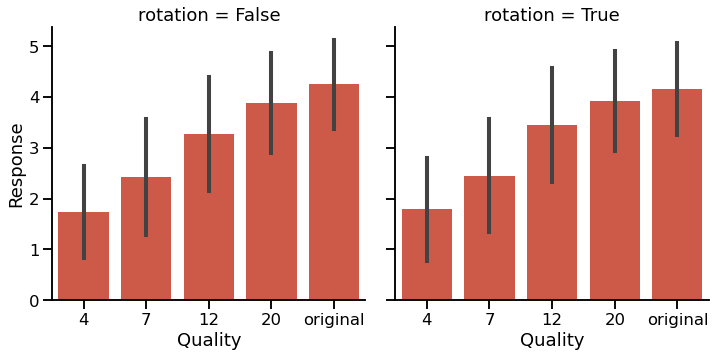

In [12]:
#split by Rotation
g = sns.catplot(x='sigma', y='response', data=df,
                kind='bar', ci='sd', color='#e34a33', col='rotation')

g.set_ylabels('Response')
g.set_xlabels('Quality')

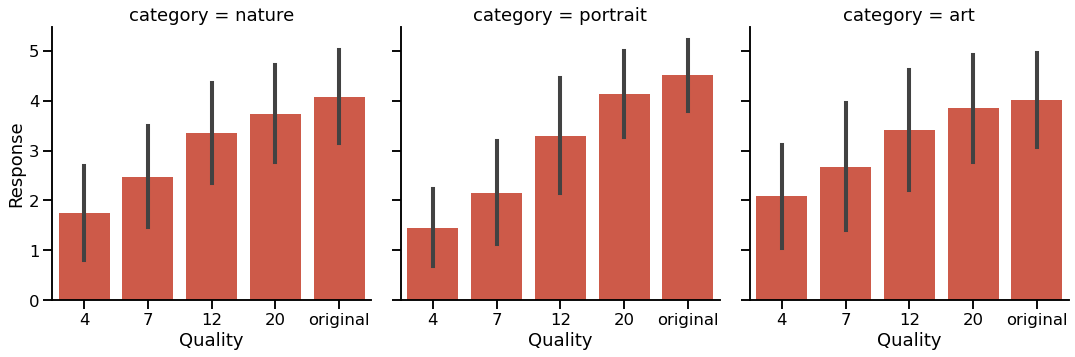

In [13]:
#split by category
g = sns.catplot(x='sigma', y='response', data=df,
                kind='bar', ci='sd', color='#e34a33', col='category')

g.set_ylabels('Response')
g.set_xlabels('Quality')

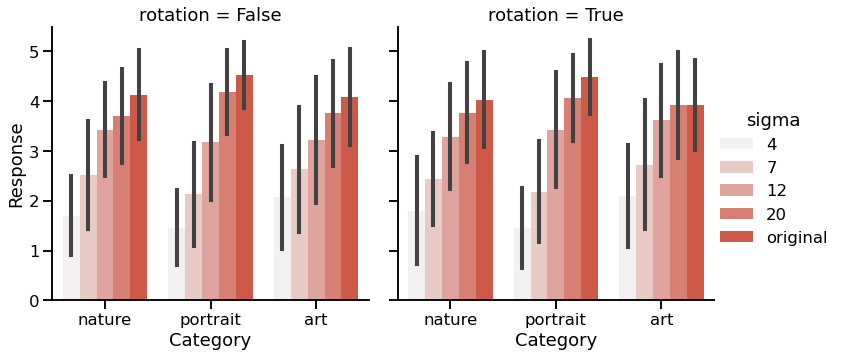

In [14]:
#split by category and rotation
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', color='#e34a33', col='rotation')


g.set_ylabels('Response')
g.set_xlabels('Category')

